In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [28]:
alpha = -0.15e4
beta = 0.75e12
#how?? alpha and beta

R = 1e4
RL = 1e-2
rho = 1e-6
#how?? rho
#how the physical parameters of the core is taken into account in the calculation


In [29]:
n = 50
Ival = 0.5
I = []
nw = 2
loss = 0
I.extend(Ival*np.ones(50))
I.extend(-Ival*np.ones(50))
for i in range(nw-1):
    Ival = Ival*np.exp(-loss)
    I.extend(Ival*np.ones(50))
    I.extend(-Ival*np.ones(50))
# step current with 3A and -3A for 150 steps

dt = 1e-8 #??? why
VL = [0]*len(I)
IL = [0]*len(I)
V = [0]*len(I)
ILguess=[0,0]
phi = [0]*len(I)
L = [0]*len(I)

[0.0, 1e-08, 2e-08, 3.0000000000000004e-08, 4e-08, 5e-08, 6.000000000000001e-08, 7e-08, 8e-08, 9e-08, 1e-07, 1.1e-07, 1.2000000000000002e-07, 1.3e-07, 1.4e-07, 1.5e-07, 1.6e-07, 1.7000000000000001e-07, 1.8e-07, 1.9e-07, 2e-07, 2.1e-07, 2.2e-07, 2.3e-07, 2.4000000000000003e-07, 2.5e-07, 2.6e-07, 2.7e-07, 2.8e-07, 2.9000000000000003e-07, 3e-07, 3.1e-07, 3.2e-07, 3.3e-07, 3.4000000000000003e-07, 3.5e-07, 3.6e-07, 3.7e-07, 3.8e-07, 3.9e-07, 4e-07, 4.1e-07, 4.2e-07, 4.3e-07, 4.4e-07, 4.5000000000000003e-07, 4.6e-07, 4.7e-07, 4.800000000000001e-07, 4.9e-07, 5e-07, 5.1e-07, 5.2e-07, 5.3e-07, 5.4e-07, 5.5e-07, 5.6e-07, 5.7e-07, 5.800000000000001e-07, 5.9e-07, 6e-07, 6.1e-07, 6.2e-07, 6.3e-07, 6.4e-07, 6.5e-07, 6.6e-07, 6.7e-07, 6.800000000000001e-07, 6.900000000000001e-07, 7e-07, 7.1e-07, 7.2e-07, 7.3e-07, 7.4e-07, 7.5e-07, 7.6e-07, 7.7e-07, 7.8e-07, 7.900000000000001e-07, 8e-07, 8.1e-07, 8.2e-07, 8.3e-07, 8.4e-07, 8.5e-07, 8.6e-07, 8.7e-07, 8.8e-07, 8.900000000000001e-07, 9.000000000000001e-0

<function matplotlib.pyplot.show(close=None, block=None)>

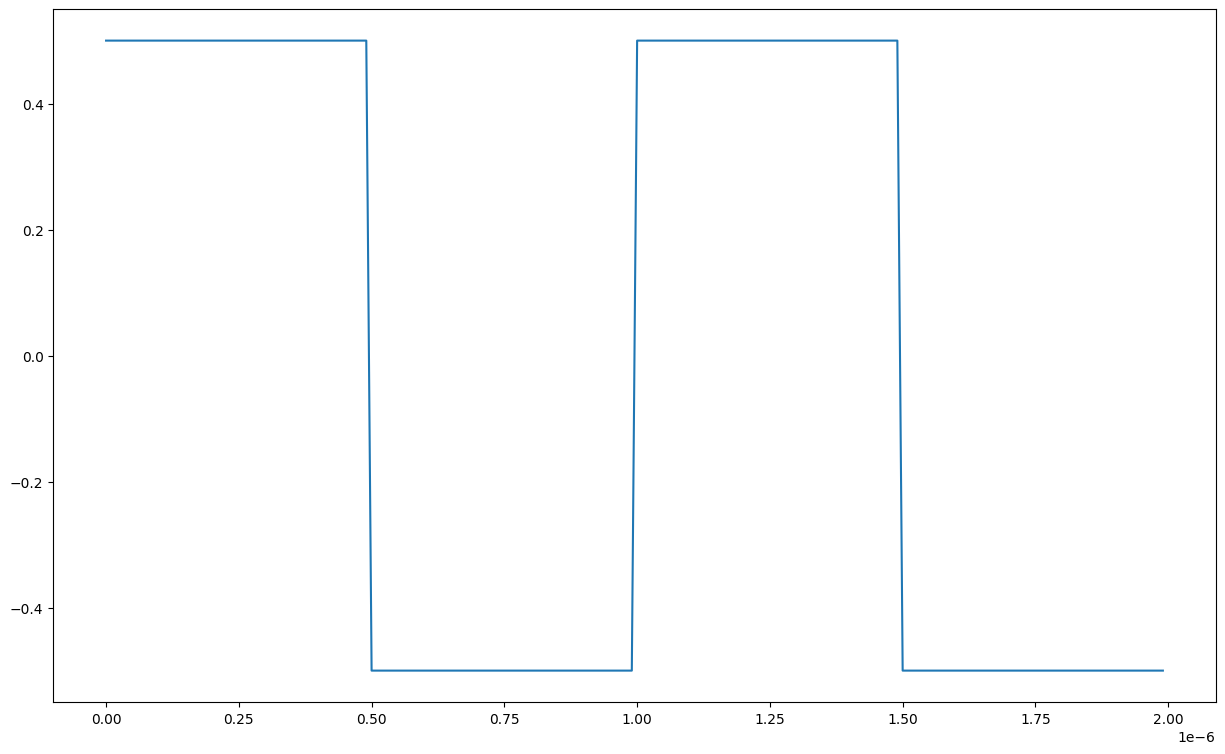

In [30]:
#t = np.arange(0,dt*len(I),dt) # 0 to 1.5us timescale in 10ns steps
#t = np.linspace(0, dt*len(I), len(I))
t = []
for i in range(len(I)):
    t.append(i*dt)
print(t)
plt.plot(t,I)
plt.show


In [31]:
dt = 1e-9
Th = 1e-7
IL[0] = 0
phi[0] = 0

In [32]:
for i in range(1,len(I),1):
    ILguess[0] = 0.5*I[i]
    diff = 1
    while(diff>Th):
        #print("diff = ", diff)
        VL[i] = R*(I[i]-ILguess[0])-ILguess[0]*RL
        V[i] = R*(I[i] - ILguess[0])
        phi[i]=phi[i-1]+VL[i]*dt
        #print("ILguess = ", ILguess[0])
        ILguess[1]=(phi[i]-phi[i-1])*(rho/dt) + 2*alpha*phi[i-1]+4*beta*phi[i-1]**3
        diff=abs(ILguess[1]-ILguess[0])
        ILguess[0] = ILguess[1]
    IL[i]=ILguess[1]
    if IL[i]-IL[i-1] != 0:
        L[i]=(phi[i]-phi[i-1])/(IL[i]-IL[i-1])
    else:
        L[i] = phi[i]/IL[i]

    


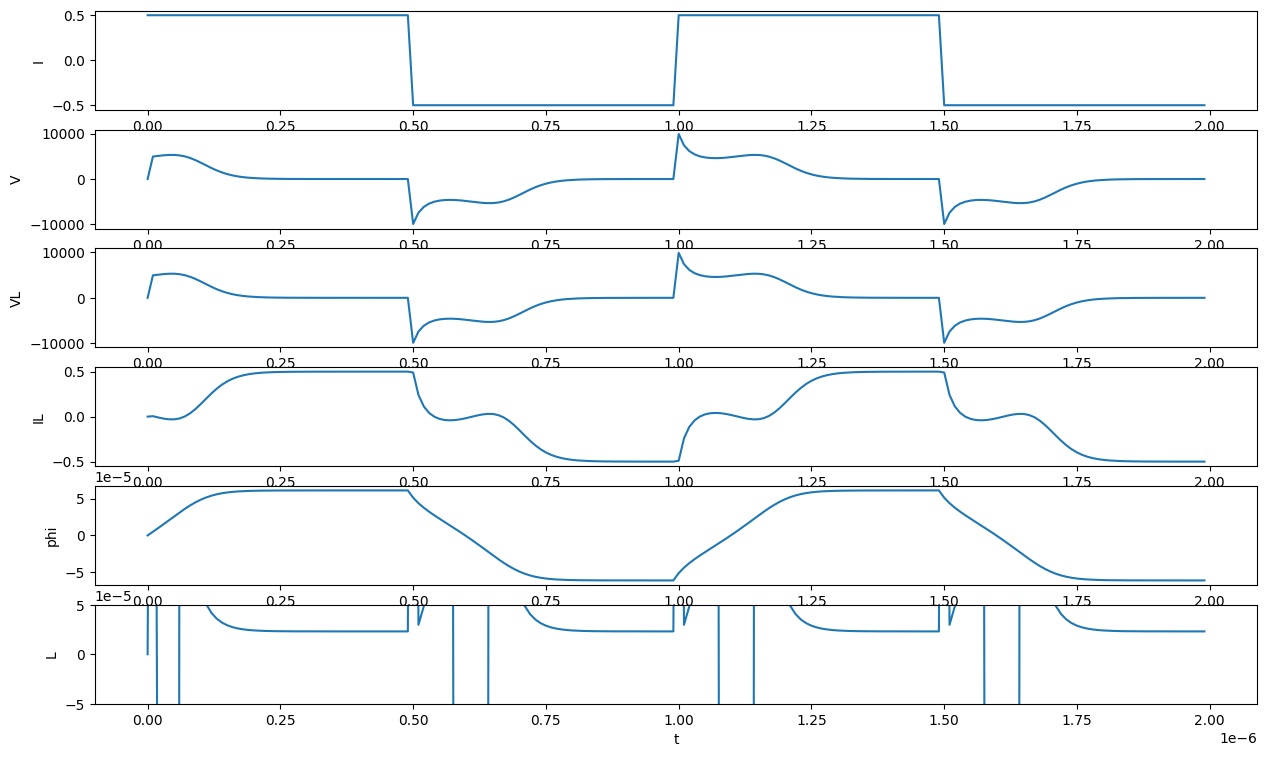

In [33]:
plt.rcParams["figure.figsize"] = (15, 9)
fig, axes = plt.subplots(6,1)

axes[0].plot(t,I)
axes[0].set_xlabel('t')
axes[0].set_ylabel('I')

axes[1].plot(t,V)
axes[1].set_xlabel('t')
axes[1].set_ylabel('V')

axes[2].plot(t,VL)
axes[2].set_xlabel('t')
axes[2].set_ylabel('VL')

axes[3].plot(t,IL)
axes[3].set_xlabel('t')
axes[3].set_ylabel('IL')

axes[4].plot(t,phi)
axes[4].set_xlabel('t')
axes[4].set_ylabel('phi')
#axes[4].axvspan(0.5, 1.5, color='red', alpha=0.1)

axes[5].set_ylim([-5*10**-5,5*10**-5])
axes[5].plot(t,L)
#axes[5].set_xlim([0,5])
axes[5].set_xlabel('t')
axes[5].set_ylabel('L')
plt.show()


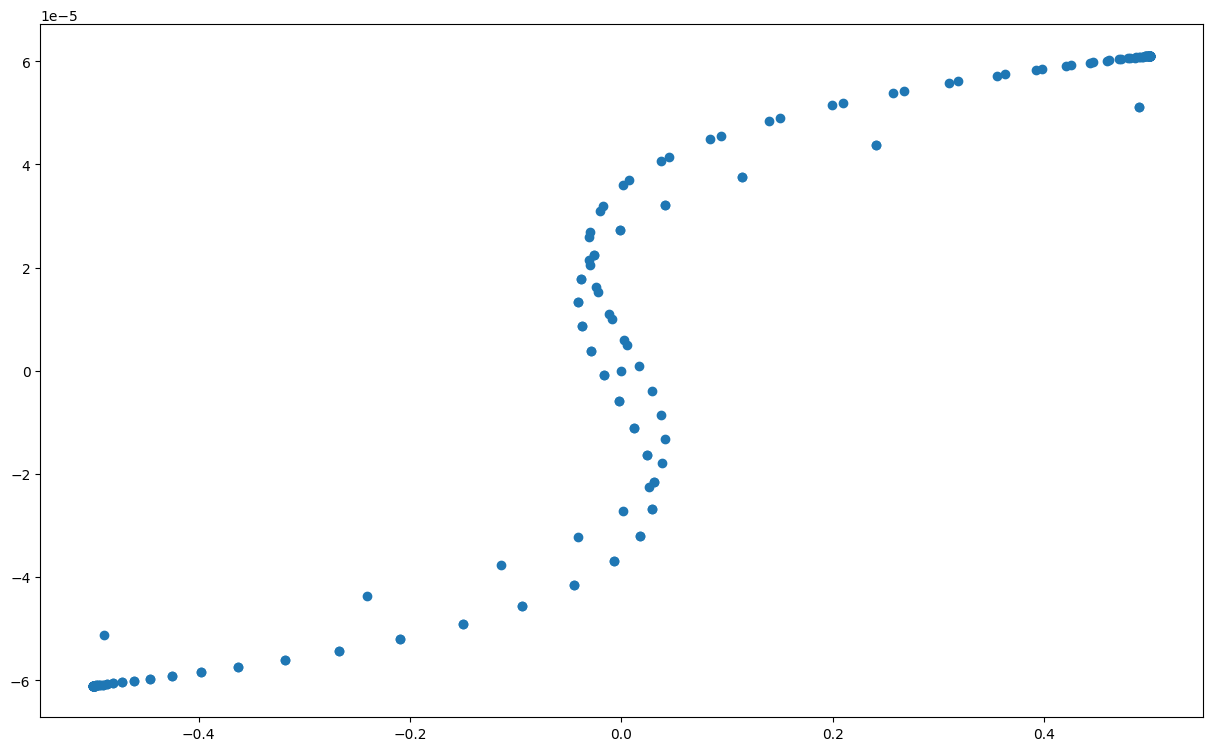

In [34]:
plt.scatter(IL,phi)
plt.show()

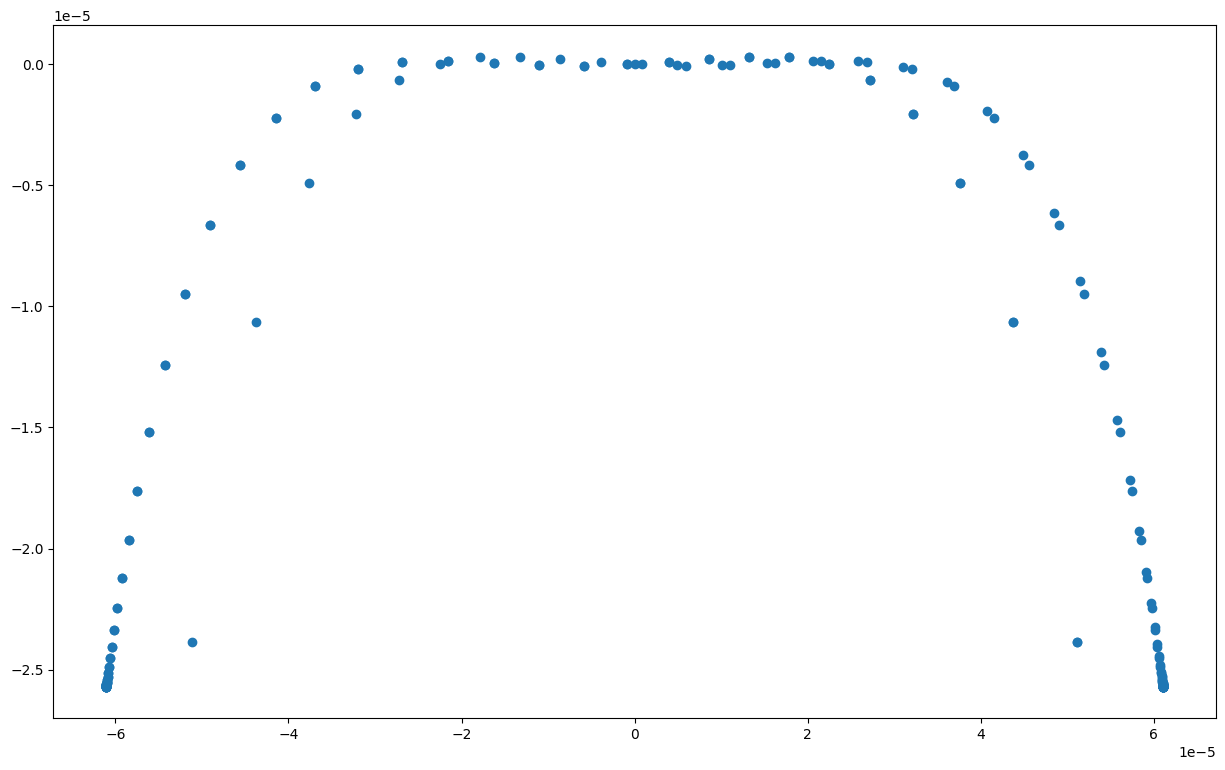

In [35]:
U = []
for i in range(len(phi)):
    U.append(alpha*phi[i]**2 + beta*phi[i]**4 - phi[i]*IL[i])

plt.scatter(phi,U)